In [1]:
library(tidyverse)
library(repr)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/Chenwen-Zhang/individual-planning-report/refs/heads/main/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
sessions <- read_csv("https://raw.githubusercontent.com/Chenwen-Zhang/individual-planning-report/refs/heads/main/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_age_max <- players |>
select(Age)|>
summarize(players_age_max=max(Age,na.rm=TRUE))

players_age_max

players_age_min <- players |>
select(Age)|>
summarize(players_age_min=min(Age,na.rm=TRUE))

players_age_min

players_age_mean <- players |>
select(Age)|>
summarize(players_age_avg=mean(Age,na.rm=TRUE))

players_age_mean

players_age_max
<dbl>
58


players_age_min
<dbl>
9


players_age_avg
<dbl>
21.13918


In [5]:
played_hours_mean <- players |>
select(played_hours)|>
summarize(played_hours_avg=mean(played_hours,na.rm=TRUE))

played_hours_mean

played_hours_min <- players |>
select(played_hours)|>
summarize(played_hours_min=min(played_hours,na.rm=TRUE))

played_hours_min

played_hours_max <- players |>
select(played_hours)|>
summarize(played_hours_max=max(played_hours,na.rm=TRUE))

played_hours_max

played_hours_avg
<dbl>
5.845918


played_hours_min
<dbl>
0


played_hours_max
<dbl>
223.1


In [6]:
player_experience_count <- players |>
select(experience)|>
group_by(experience)|>
summarize(count=n())

player_experience_count

player_gender_count <- players |>
select(gender)|>
group_by(gender)|>
summarize(count=n())

player_gender_count

player_subscribe_count <- players |>
select(subscribe)|>
group_by(subscribe)|>
summarize(count=n())

player_subscribe_count

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


In [7]:
sessions_mutated <- sessions|>
select(start_time:original_end_time)|>
mutate(duration=original_end_time-original_start_time)

sessions_mutated

start_time,end_time,original_start_time,original_end_time,duration
<chr>,<chr>,<dbl>,<dbl>,<dbl>
30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,0e+00
17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,0e+00
25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,0e+00
25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,0e+00
25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,0e+00
23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,0e+00
15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,0e+00
21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,1e+07
21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,0e+00


Data description of players dataset

1. number of observations : 196
2. number of variables: 7
3. name and type of variables:
   
(1) experience(chr): the degree of familiarity with and skill in the game

(2) gender(chr): the gender of the player

(3) age(chr): the age of the player

(4) played_hours(dbl): how long does the person play the game

(5) subscribe(lgl): whether players subscribe the game

Data description of sessions dataset

1. number of observations : 1535
2. number of variables: 5
3. name and type of variables:

(1) hashedEmail(chr): the hashedEmail of players 

(2) start_time(chr): the start time of the player

(3) end_time(chr): the end time of the player

(4) original_start_time(dbl): the original start time of the player

(5) original_end_time(dbl): the original end time of the player

Questions
1. One broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
2. Specific question:
- Can players' age predict whether they will subscribe a game-related newsletter?

3. How the data will help me address the question of interest?
subscribe is responsible variable and experience, gender, age and played_hours are predictors

4. wrangle data
- process the missing data (NA)
- convert charactor into factor

5. prediction model: classification, because responsible variable is a categorical variable. And data requires to be
standardized

In [15]:
players_tidy <- players |>
mutate(experience=as.factor(Age),
       subscribe=as.factor(subscribe),
       gender=as.factor(gender))|>
drop_na()

players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
9,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
17,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
17,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
21,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
21,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
17,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
19,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
21,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
47,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


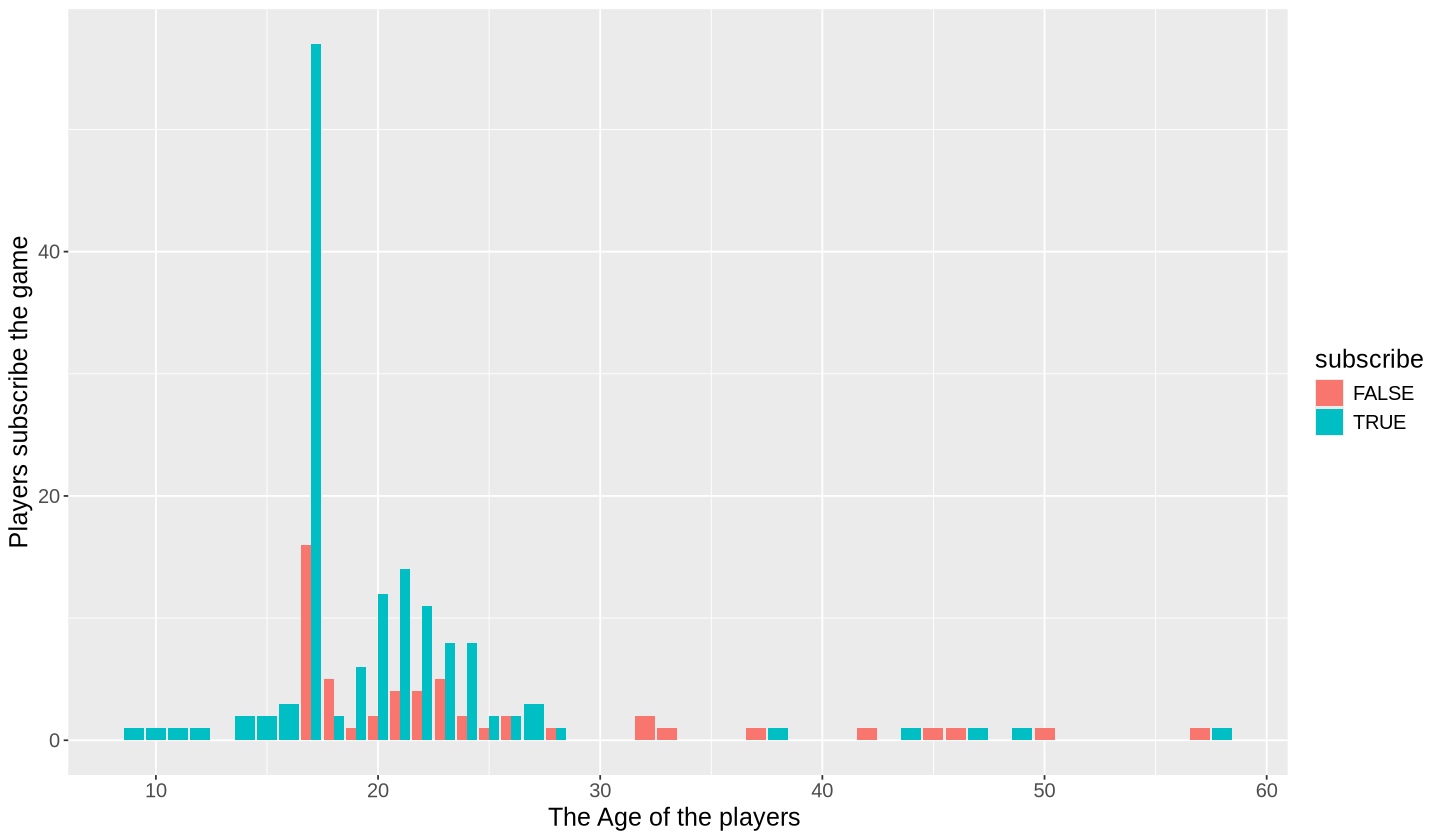

In [16]:
options(repr.plot.width=12, repr.plot.height=7)

players_plot_1 <- players_tidy |>
select(Age,subscribe)|>
ggplot(aes(x = Age, fill = subscribe)) + 
   geom_bar(position = "dodge") +
   scale_x_continuous(breaks = seq(0,60,by=10))+
   xlab("The Age of the players ") +
   ylab("Players subscribe the game")+
   theme(text=element_text(size=15))

players_plot_1

This bar plot visualizes the comparison related to whether players subscribe the game within different ages. Based on this graph, it displays that 17-year-old players has the highest number for both subscribed and non-subscibed, which recorded by far highest figures.

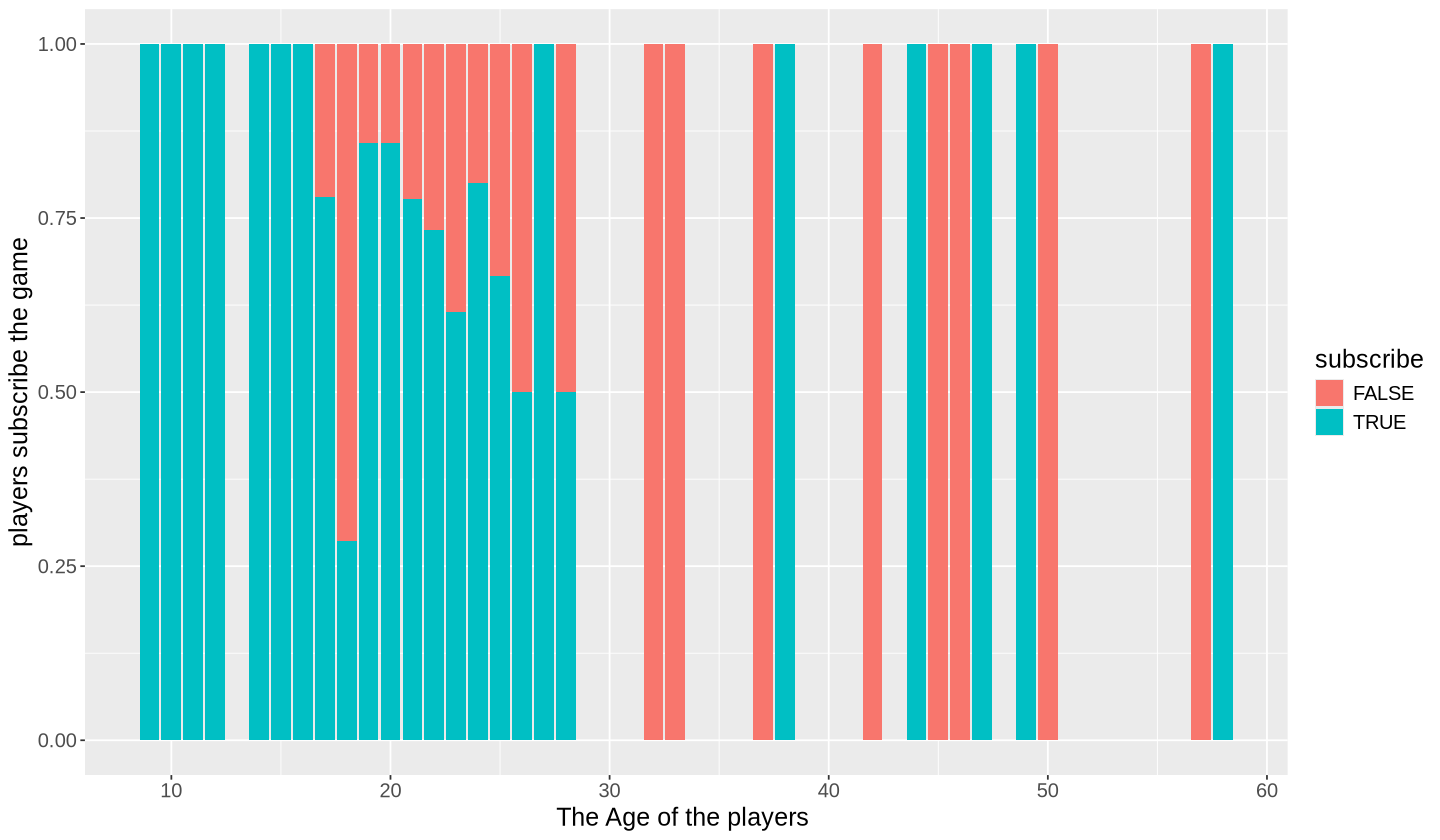

In [17]:
options(repr.plot.width=12, repr.plot.height=7)

players_plot_2 <- players_tidy |>
select(Age,subscribe)|>
ggplot(aes(x = Age, fill = subscribe)) + 
   geom_bar(position = "fill") +
   scale_x_continuous(breaks = seq(0,60,by=10))+
   xlab("The Age of the players ") +
   ylab("players subscribe the game")+
   theme(text=element_text(size=15))

players_plot_2

This bar chart compares the proportion of players who subscribed across different age groups. It is clear that players around or under 15 years old all subscribed the game. Regarding to younger players (under 30), they are generally more likely to subscribe, but also a lot of them did not, especially those aged 18 that only has approximately 30% subscribed to the game. 

By contrast, players above 30 displays a quite balance subscription patterns, with roughly equal subscribed and non-subscibed.

Overall, the graph shows that even if the young occur many non-subscribed players, they also represent the majority of the data set. Therefore, the young players group has a great potential for game engagement.

Methods and plan
1. The classification is appropriate because the responsible variable (subscribe) is a categorical type.
2. The K-nearest neighbors (KNN) algorithms can be used here because it can use data directly ot form the class by measuring the proximity to neigboring points to determine the class of a new sample.
3. KNN algorithms requires few assumptions about what the data must look like. It can essencially capture any kind of shape of data for a class.
4. the potential limitations or weaknesses of the method selected:
- becomes very slow as the training data gets larger
- may not perform well with a large number of predictors
- may not perform well when classes are inbalanced
  
5. I'm going to compare and select the model by cross-validation.
6. Once we have decided on a predictive question to answer and done some preliminary exploration,the next thing is to split the data into training data and testing data. I will use 75% of the data for training and 25% for testing.The subset of training data used for evaluation is the validation set.And then I will use it for cross-validation.